In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

In [10]:
scheme = pg.DataContainerERT()

nelecs = 10
pos = np.zeros((nelecs, 2))
pos[:, 0] = np.linspace(5, 25, nelecs)
scheme.setSensorPositions(pos)

measurements = np.array((
    [1, 2, 1, 2],  # Dipole-Dipole
    [0, 9, 3, 6],  # Wenner
    [0, 9, 4, 5]   # Schlumberger
))

for i, elec in enumerate("abmn"):
    scheme[elec] = measurements[:,i]

scheme["k"] = ert.createGeometricFactors(scheme)

08/02/23 - 22:36:41 - pyGIMLi - INFO - Save RVector binary
08/02/23 - 22:36:41 - pyGIMLi - INFO - Cache stored: /Users/gprabhakar/Library/Caches/pygimli/3147752934764057521


In [11]:
world = mt.createWorld(start=[0, 0], end=[30, -10], worldMarker=True)
for pos in scheme.sensorPositions():
    world.createNode(pos)

mesh = mt.createMesh(world, area=.05, quality=33, marker=1)

In [12]:
fop = ert.ERTModelling()
fop.setData(scheme)
fop.setMesh(mesh)

model = np.ones(mesh.cellCount())
fop.createJacobian(model)

08/02/23 - 22:36:45 - pyGIMLi - INFO - Found 1 regions.
08/02/23 - 22:36:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/02/23 - 22:36:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


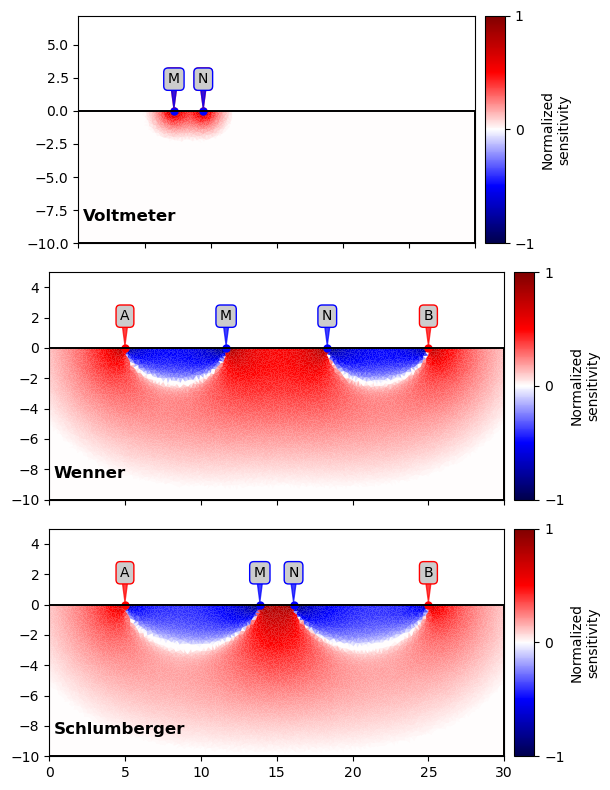

In [13]:
def getABMN(scheme, idx):
    """ Get coordinates of four-point cfg with id `idx` from DataContainerERT
    `scheme`."""
    coords = {}
    for elec in "abmn":
        elec_id = int(scheme(elec)[idx])
        elec_pos = scheme.sensorPosition(elec_id)
        coords[elec] = elec_pos.x(), elec_pos.y()
    return coords


def plotABMN(ax, scheme, idx):
    """ Visualize four-point configuration on given axes. """
    coords = getABMN(scheme, idx)
    for elec in coords:
        x, y = coords[elec]
        if elec in "ab":
            color = "red"
        else:
            color = "blue"
        ax.plot(x, y, marker=".", color=color, ms=10)
        ax.annotate(elec.upper(), xy=(x, y), ha="center", fontsize=10, bbox=dict(
            boxstyle="round", fc=(0.8, 0.8, 0.8), ec=color), xytext=(0, 20),
                    textcoords='offset points', arrowprops=dict(
                        arrowstyle="wedge, tail_width=.5", fc=color, ec=color,
                        patchA=None, alpha=0.75))
        ax.plot(coords["a"][0],)

labels = ["Voltmeter", "Wenner", "Schlumberger"]
fig, ax = plt.subplots(scheme.size(), 1, sharex=True, figsize=(6,8))

senses = []
for i, sens in enumerate(fop.jacobian()):
    # Label in lower-left corner
    ax[i].text(.01, .15, labels[i], horizontalalignment='left',
               verticalalignment='top', transform=ax[i].transAxes, fontsize=12,
               fontweight="bold")

    # Electrode annotations
    plotABMN(ax[i], scheme, i)

    # Log-scaled and normalized sensitivity
    normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 8e-4)
    normsens /= np.max(normsens)
    senses.append(normsens)
    pg.show(mesh, normsens, cMap="seismic", ax=ax[i], orientation="vertical",
            label="Normalized\nsensitivity", nLevs=3, cMin=-1, cMax=1)

fig.tight_layout()

In [14]:
senses

[10199 [0.0,...,0.0],
 10199 [0.24714529367921867,...,0.25555370011698336],
 10199 [0.2308533305243347,...,-0.0983645746691113]]

08/02/23 - 22:36:51 - pyGIMLi - INFO - Cache /Users/gprabhakar/miniconda3/lib/python3.9/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 1): /Users/gprabhakar/Library/Caches/pygimli/3135590448333855727
08/02/23 - 22:36:53 - pyGIMLi - INFO - Found 1 regions.
08/02/23 - 22:36:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/02/23 - 22:36:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


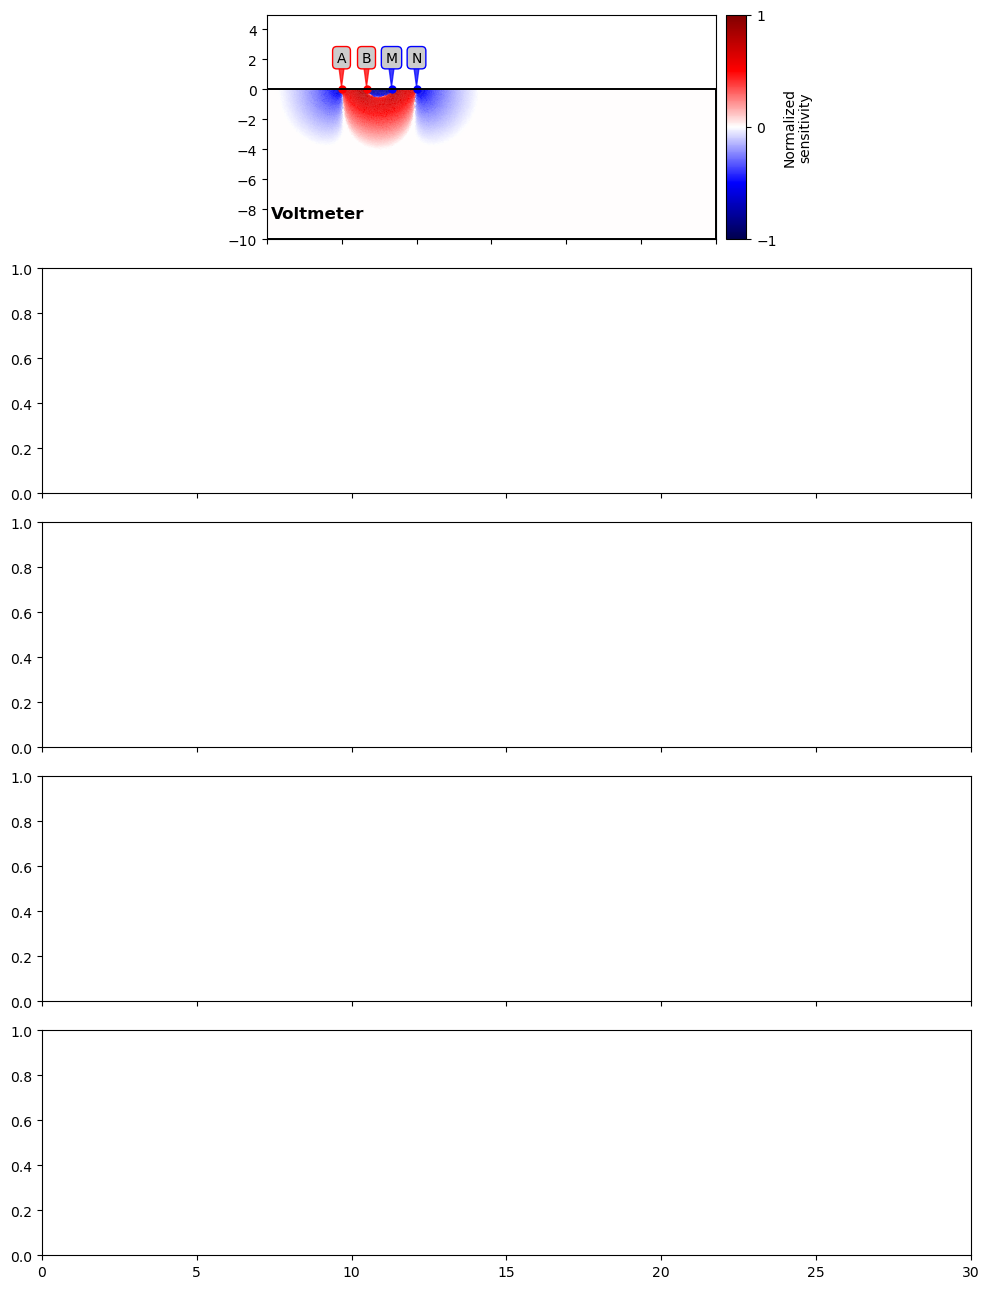

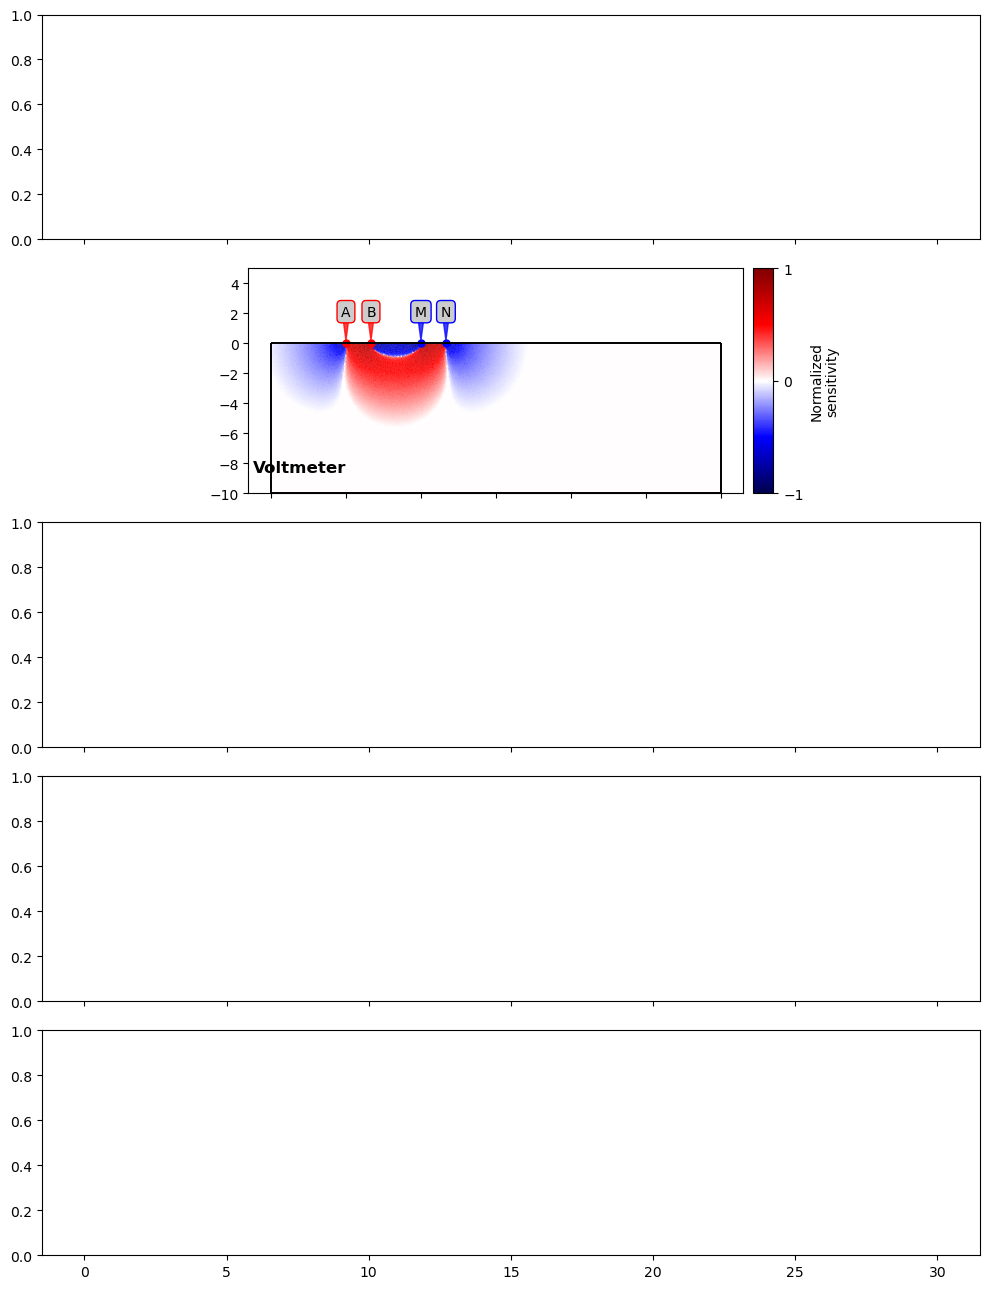

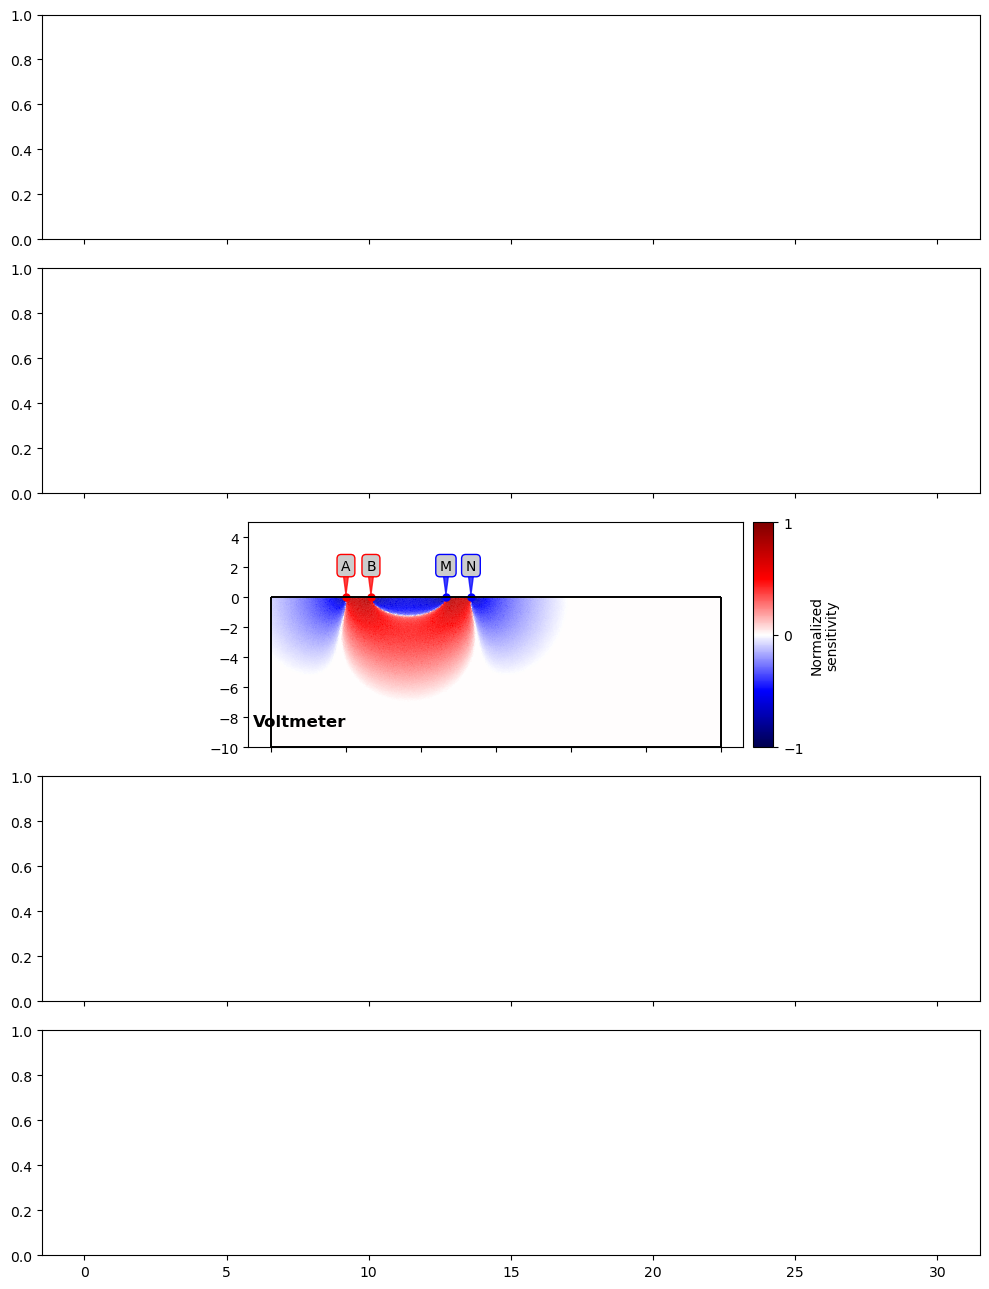

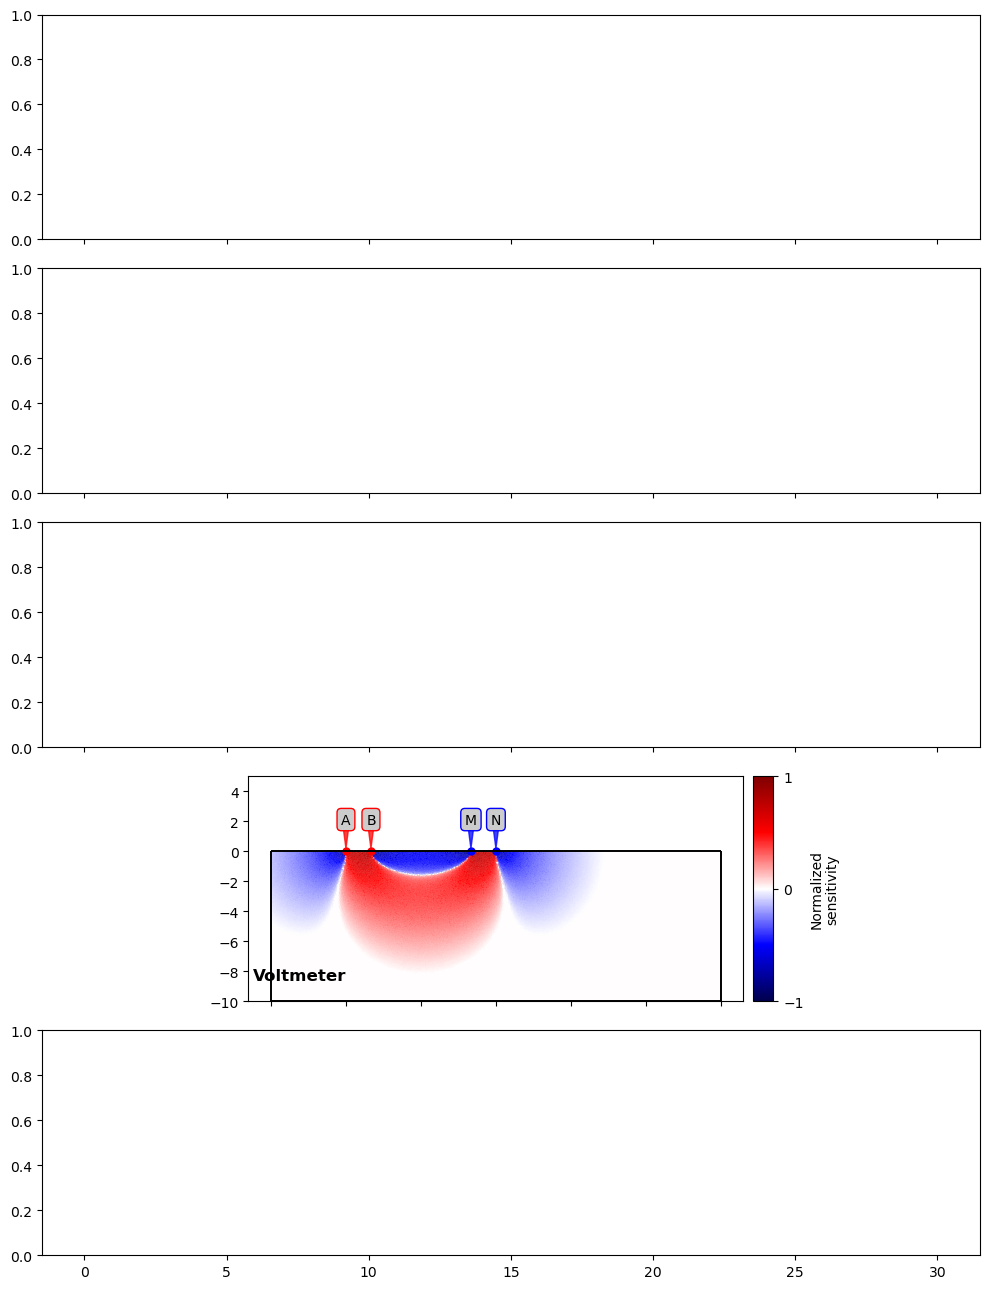

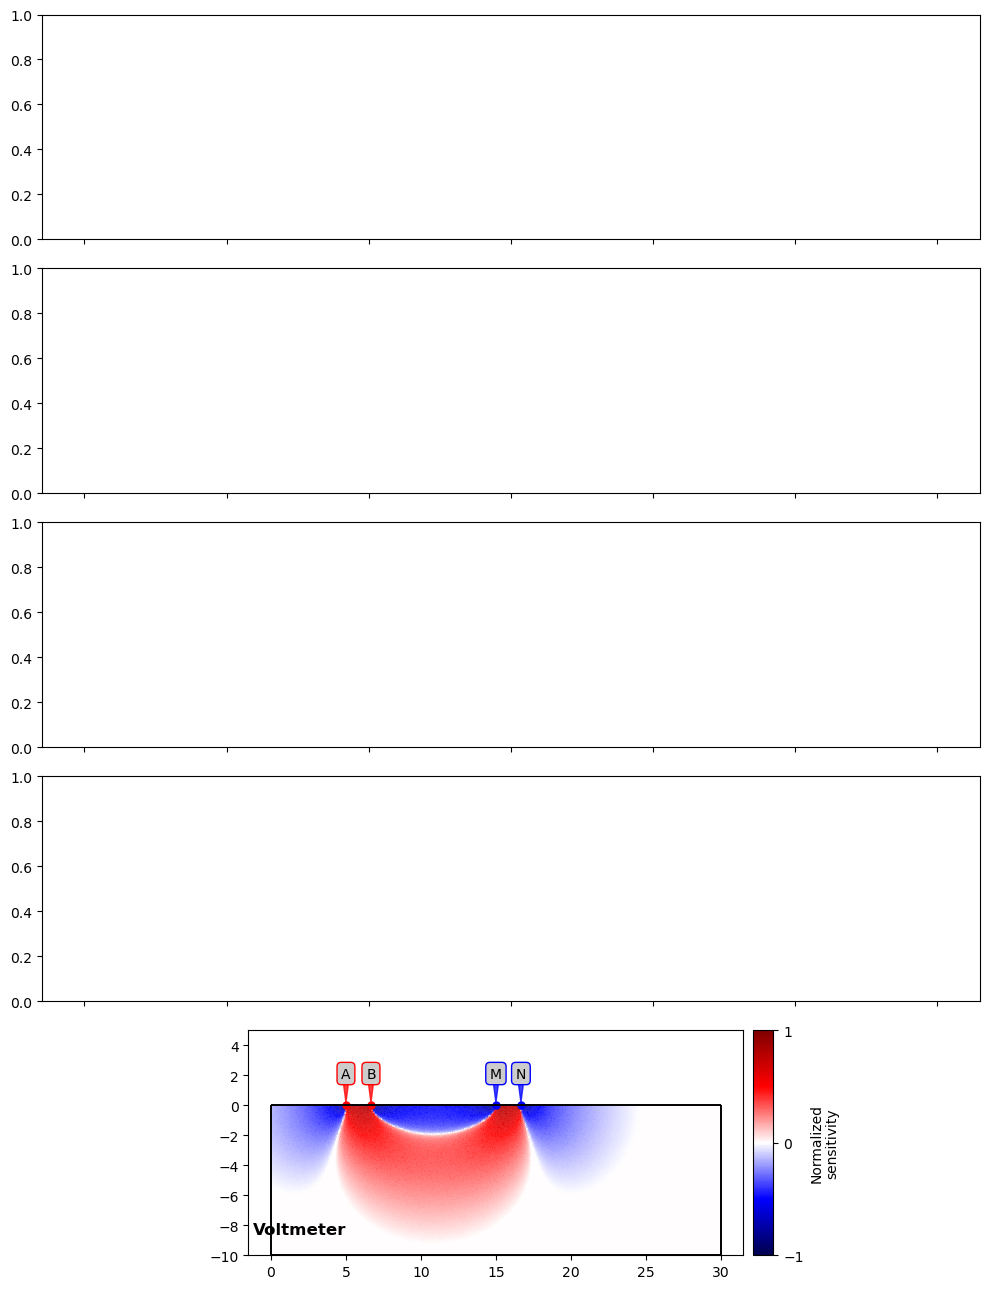

In [15]:
# Dipole-Dipole 
scheme = pg.DataContainerERT()

nelecs = 13
pos = np.zeros((nelecs, 2))
pos[:, 0] = np.linspace(5, 25, nelecs)
scheme.setSensorPositions(pos)

a = 1
n = np.arange(5)
first = np.array([0, 1., 2, 3])

measurements = []

for i in n:
    f = np.copy(first)
    f[2:] += i*a
    measurements.append(f)
    
measurements = np.array(measurements)

# measurements = np.array((
#     [0, 1, 2, 3],  # Dipole-Dipole
#     [0, 1, 0, 1],  # Wenner
#     [0, 2, 3, 1]   # Schlumberger
# ))

for i, elec in enumerate("abmn"):
    scheme[elec] = measurements[:,i]

scheme["k"] = ert.createGeometricFactors(scheme)

world = mt.createWorld(start=[0, 0], end=[30, -10], worldMarker=True)
for pos in scheme.sensorPositions():
    world.createNode(pos)

mesh = mt.createMesh(world, area=.01, quality=33, marker=1)

fop = ert.ERTModelling()
fop.setData(scheme)
fop.setMesh(mesh)

model = np.ones(mesh.cellCount())
fop.createJacobian(model)





senses = []
for i, sens in enumerate(fop.jacobian()):
    fig, ax = plt.subplots(scheme.size(), 1, sharex=True, figsize=(10,13))
    # Label in lower-left corner
    ax[i].text(.01, .15, "Voltmeter", horizontalalignment='left',
               verticalalignment='top', transform=ax[i].transAxes, fontsize=12,
               fontweight="bold")

    # Electrode annotations
    plotABMN(ax[i], scheme, i)

    # Log-scaled and normalized sensitivity
    normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 8e-4)
    normsens /= np.max(normsens)
    senses.append(normsens)
    pg.show(mesh, normsens, cMap="seismic", ax=ax[i], orientation="vertical",
            label="Normalized\nsensitivity", nLevs=3, cMin=-1, cMax=1)

    fig.tight_layout()

(51206,)

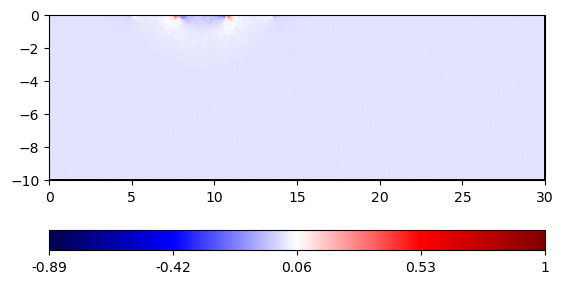

In [24]:
# Figure out a way to calculate sensitivity vs. depth

pg.show(mesh, senses[0], cMap="seismic")
senses[0].shape

In [116]:
# print(c.center().x(), c.center().y(), str(c.id()))
# for c in mesh.cells()
# ax, _ = pg.show(mesh, showMesh=True)

z = np.linspace(0, -10, 100)
x = np.linspace(0, 30)

yc = []
ids = []

for c in mesh.cells():
    yc.append(c.center().y())
    ids.append(c.id())

In [117]:
cum_sens = []
tot_sens = []


ys = np.array(yc)

for i in range(len(z)-1):
    arr = senses[0][np.where((z[i]>ys) & (z[i+1]<ys))[0]]
    tot_sens.append(arr)
    cum_sens.append(np.average(arr))

0.011476946717302806 (array([29]),)


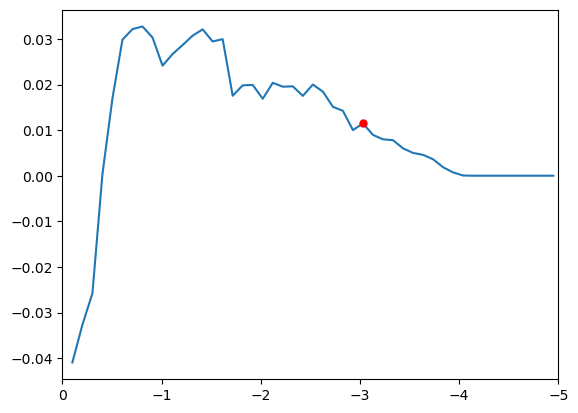

In [147]:
"""
(1) Obtain a cumulative sensitivity vs. depth for an electrode configuration.
(2) Find where the function goes to 0 and truncate it there.
(3) Smooth the function.
(4) Identify the median and label it the DOA.
(5) Plotting function given a sensitivity vector and mesh.
"""

cusens = np.array(cum_sens)[np.where(z[1:]>=-5)]
depths = z[1:][np.where(z[1:]>=-5)]
medy = np.median(cusens)
print(medy, np.where(cusens==medy))
medx = z[1:][np.where(cusens==medy)]
plt.plot(depths, cusens)
plt.xlim(0, -5)
plt.plot(medx, medy, marker=".", color="r", ms=10)


In [30]:
# (1)
import time

def sensitivity_map(measurements):

    st = time.time()
    scheme = pg.DataContainerERT()

    nelecs = max(4, int(np.max(measurements))+1)
    pos = np.zeros((nelecs, 2))
    pos[:, 0] = np.linspace(5, 25, nelecs)
    scheme.setSensorPositions(pos)
    
    for i, elec in enumerate("abmn"):
        scheme[elec] = measurements[:,i]

    scheme["k"] = ert.createGeometricFactors(scheme)

    world = mt.createWorld(start=[0, 0], end=[30, -10], worldMarker=True)
    for pos in scheme.sensorPositions():
        world.createNode(pos)

    mesh = mt.createMesh(world, area=.01, quality=33, marker=1)

    fop = ert.ERTModelling()
    fop.setData(scheme)
    fop.setMesh(mesh)

    model = np.ones(mesh.cellCount())
    fop.createJacobian(model)
    
    senses = []
    
    for i, sens in enumerate(fop.jacobian()):
        normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 8e-4)
        normsens /= np.max(normsens)
        senses.append(normsens)
        
    et = time.time()
    print(et - st)
    
    return mesh, senses

In [31]:
a = 1
n = np.arange(5)
first = np.array([0, 1., 2, 3])

measurements = []

for i in n:
    f = np.copy(first)
    f[2:] += i*a
    measurements.append(f)
    
measurements = np.array(measurements)
mesh, senses = sensitivity_map(measurements)

03/02/23 - 16:30:33 - pyGIMLi - INFO - Cache /Users/gprabhakar/miniconda3/lib/python3.9/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 6): /Users/gprabhakar/Library/Caches/pygimli/2878098676460115369
03/02/23 - 16:30:35 - pyGIMLi - INFO - Found 1 regions.
03/02/23 - 16:30:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/02/23 - 16:30:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


8.973576307296753


In [32]:
print(measurements)

[[0. 1. 2. 3.]
 [0. 1. 3. 4.]
 [0. 1. 4. 5.]
 [0. 1. 5. 6.]
 [0. 1. 6. 7.]]


In [33]:
# (2)
def sensitivity_func(mesh, senses):
        
    z = np.linspace(0, -10, 100) # hard-coded right now
    yc = [c.center().y() for c in mesh.cells()]
    
    cum_sens = np.array([np.average(senses[np.where((z[i]>yc) & (z[i+1]<yc))[0]]) for i in range(len(z) - 1)])

    cusens = cum_sens[np.where((cum_sens>=0.005) | (cum_sens<=-0.005))]
    depths = z[1:][np.where((cum_sens>=0.005) | (cum_sens<=-0.005))]
    
    return cusens, depths

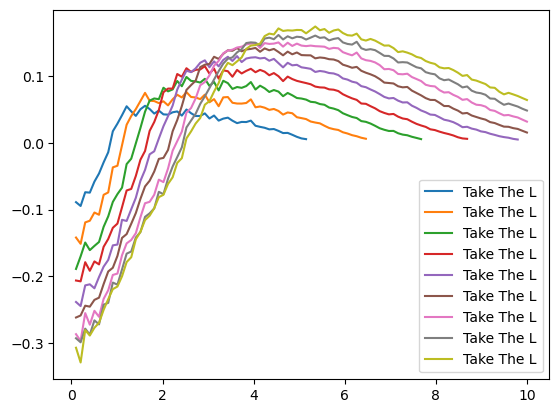

In [62]:
for s in senses[1:]:
    cusens, depths = sensitivity_func(mesh, s)
    plt.plot(-1*depths, cusens, label="Take The L")
    
plt.legend()    

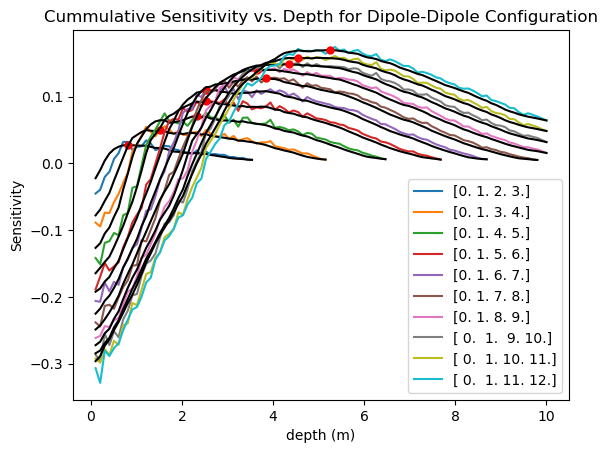

In [63]:
# (3)

def moving_average(x, y, n = 5):
    xnew = x
    ynew = np.array([np.average(y[i-5:i]) for i in range(5, len(y)+5)])
    
    return xnew, ynew
        
        
mcs = []
mdps = []

for i, s in enumerate(senses):
    cusens, depths = sensitivity_func(mesh, s)
    plt.plot(-1*depths, cusens, label=str(measurements[i]))
    xnew, ynew = moving_average(depths, cusens)
    plt.plot(-1*xnew, ynew, "k")
    
    mcs.append(ynew)
    mdps.append(xnew)
    
    z, sens = DOA(xnew, ynew)
    plt.plot(-1*z, sens, marker=".", color="r", ms=10)
    
    plt.title("Cummulative Sensitivity vs. Depth for Dipole-Dipole Configuration")
    plt.xlabel("depth (m)")
    plt.ylabel("Sensitivity")
    
plt.legend() 



In [64]:
# (4)

def DOA(depths, sensitivity_func):
    medy = np.max(sensitivity_func)
    
    mins = np.abs(sensitivity_func - medy)
    medx = depths[np.where(mins==mins.min())][0]
    
    return medx, medy

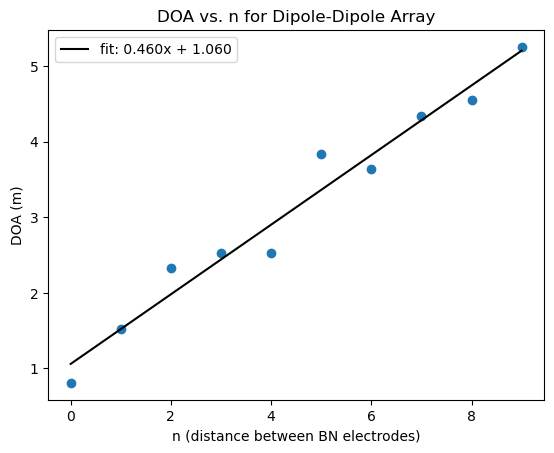

In [65]:
from scipy.optimize import curve_fit

meds = [DOA(mdps[i], mcs[i]) for i in range(len(mdps))]
z, sens = zip(*meds)

def func(x, a, b):
     return a*x + b
    
popt, pcov = curve_fit(func, n, np.abs(np.array(list(z))))

plt.scatter(n, np.abs(np.array(list(z))))

plt.plot(n, func(n, *popt), 'k-',
          label='fit: %5.3fx + %5.3f' % tuple(popt))

plt.title("DOA vs. n for Dipole-Dipole Array")
plt.xlabel("n (distance between BN electrodes)")
plt.ylabel("DOA (m)")
plt.legend()

In [61]:
# Sensitivity Maps for Dipole-Dipole
a = 1
n = np.arange(10)
first = np.array([0, 1., 2, 3])

measurements = []

for i in n:
    f = np.copy(first)
    f[2:] += i*a
    measurements.append(f)
    
measurements = np.array(measurements)
mesh, senses = sensitivity_map(measurements)

03/02/23 - 17:03:31 - pyGIMLi - INFO - Cache /Users/gprabhakar/miniconda3/lib/python3.9/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 6): /Users/gprabhakar/Library/Caches/pygimli/2927869585246360750
03/02/23 - 17:03:32 - pyGIMLi - INFO - Found 1 regions.
03/02/23 - 17:03:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/02/23 - 17:03:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


11.937664031982422


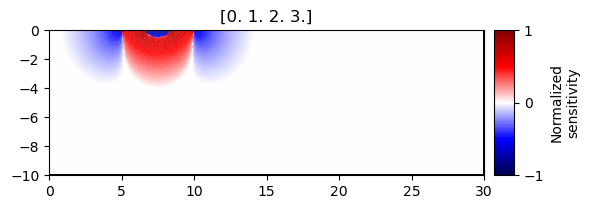

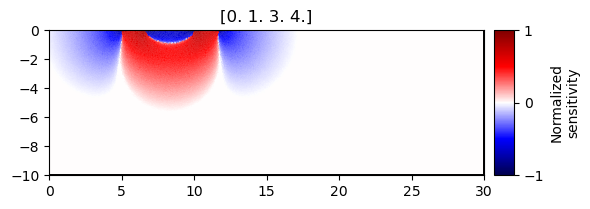

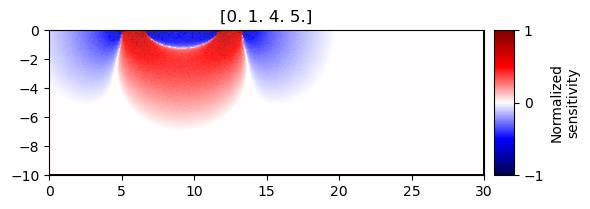

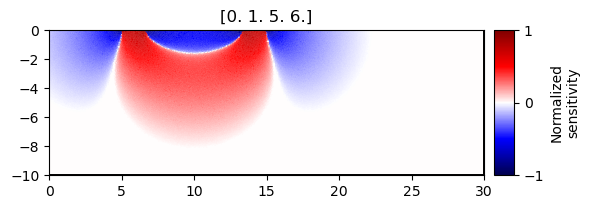

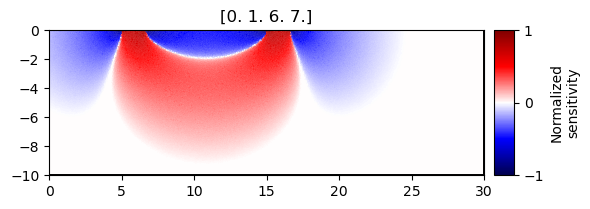

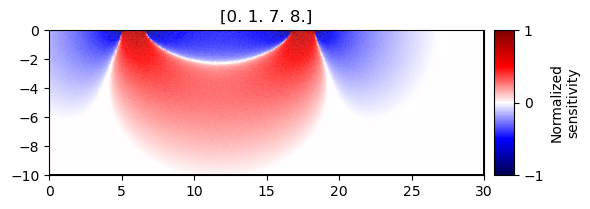

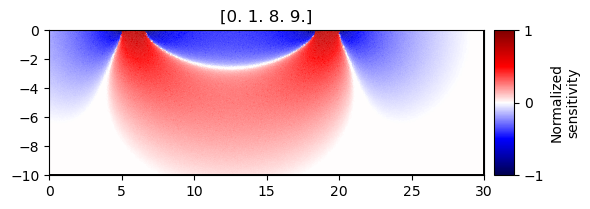

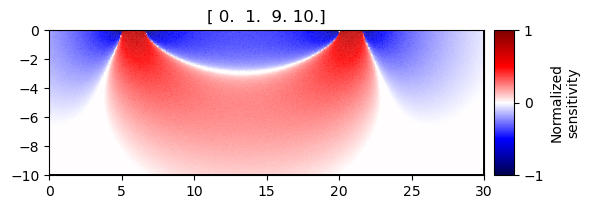

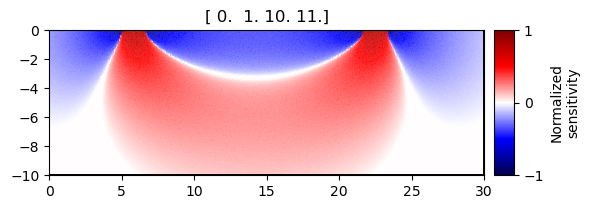

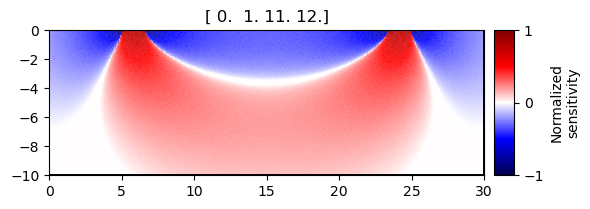

In [46]:
for i, s in enumerate(senses):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(6,8))
    
    pg.show(mesh, s, cMap="seismic", ax=ax, orientation="vertical",
            label="Normalized\nsensitivity", nLevs=3, cMin=-1, cMax=1)
    
    ax.title.set_text(str(measurements[i]))
    
# senses = []
# for i, sens in enumerate(fop.jacobian()):
#     # Label in lower-left corner
#     ax[i].text(.01, .15, labels[i], horizontalalignment='left',
#                verticalalignment='top', transform=ax[i].transAxes, fontsize=12,
#                fontweight="bold")

#     # Electrode annotations
#     plotABMN(ax[i], scheme, i)

#     # Log-scaled and normalized sensitivity
#     normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 8e-4)
#     normsens /= np.max(normsens)
#     senses.append(normsens)
#     pg.show(mesh, normsens, cMap="seismic", ax=ax[i], orientation="vertical",
#             label="Normalized\nsensitivity", nLevs=3, cMin=-1, cMax=1)


    

In [22]:
print(measurements)

[[ 0.  1.  2.  3.]
 [ 0.  1.  3.  4.]
 [ 0.  1.  4.  5.]
 [ 0.  1.  5.  6.]
 [ 0.  1.  6.  7.]
 [ 0.  1.  7.  8.]
 [ 0.  1.  8.  9.]
 [ 0.  1.  9. 10.]
 [ 0.  1. 10. 11.]
 [ 0.  1. 11. 12.]]
